In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train_data = pd.read_csv('tokenized.csv', usecols=['fraudulent','lemm_tokens'])
train_data.head()

,fraudulent,lemm_tokens
0,0,"['we', 'food52', 'create', 'groundbreaking', '..."
1,0,"['90', 'second', 'worlds', 'cloud', 'video', '..."
2,0,"['valor', 'service', 'provide', 'workforce', '..."
3,0,"['our', 'passion', 'improve', 'quality', 'life..."
4,0,"['spotsource', 'solutions', 'llc', 'global', '..."


In [3]:
print('Shape of training data :',train_data.shape)

Shape of training data : (17880, 2)


In [4]:
y = train_data["fraudulent"]
X = train_data["lemm_tokens"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [6]:
tfidf = TfidfVectorizer()
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(14304, 81083)
(3576, 81083)


# Check the words 'learnt' by vectorizer

In [7]:
#tfidf.vocabulary_

# SGD Classifier

In [8]:
sgd = SGDClassifier(loss="modified_huber", penalty="l2", shuffle=True, random_state=420)
sgd.fit(X_train_tfidf, y_train)
y_predicted_sgd = sgd.predict(X_test_tfidf)
print(classification_report(y_test, y_predicted_sgd))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3428
           1       0.98      0.81      0.89       148

    accuracy                           0.99      3576
   macro avg       0.98      0.90      0.94      3576
weighted avg       0.99      0.99      0.99      3576



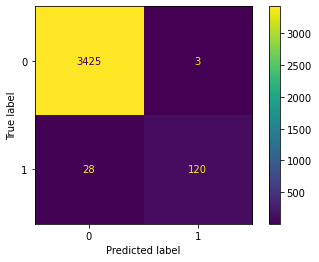

In [9]:
cm = confusion_matrix(y_test, y_predicted_sgd, labels=sgd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd.classes_)
disp.plot()

# Understanding confusion matrix
00: True Positive - Job postings that are legitimate and identified as legitimate

11: True Negative - Job postings that are fraudulent and identified as fraudulent

01: False Positive - Job postings that are legitimate but identified as fraudulent

10: False Negative - Job postings that are fraudulent but identified as legitimate

# Random Forest Classifier

In [10]:
regr=RandomForestClassifier(n_estimators = 100, max_features = "sqrt", class_weight = "balanced", random_state = 42)
regr.fit(X_train_tfidf,y_train)
y_predicted_regr = regr.predict(X_test_tfidf)

print(classification_report(y_test,y_predicted_regr))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3428
           1       0.98      0.57      0.72       148

    accuracy                           0.98      3576
   macro avg       0.98      0.78      0.85      3576
weighted avg       0.98      0.98      0.98      3576



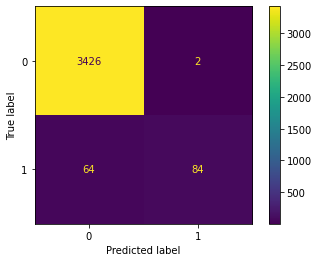

In [11]:
cm = confusion_matrix(y_test, y_predicted_regr, labels=regr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=regr.classes_)
disp.plot()

# K-Neighbours 

In [12]:
neigh = KNeighborsClassifier(n_neighbors=5, weights="distance")
neigh.fit(X_train_tfidf,y_train)
y_predicted_neigh = neigh.predict(X_test_tfidf)

print(classification_report(y_test,y_predicted_neigh))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3428
           1       0.85      0.86      0.86       148

    accuracy                           0.99      3576
   macro avg       0.92      0.93      0.92      3576
weighted avg       0.99      0.99      0.99      3576



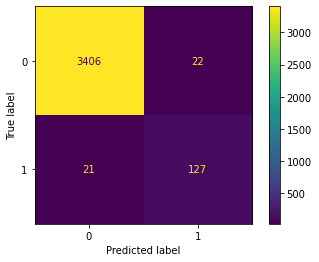

In [13]:
cm = confusion_matrix(y_test, y_predicted_neigh, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()